In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [89]:
data=pd.read_excel(r"cancer patient data sets.xlsx")

In [90]:
data

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


# Removing PatientID from the database

In [91]:
data=data.drop('Patient Id',axis=1)
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


# Checking for null values (if any)

In [92]:
data.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

# Applying Label Encoder in column 'Level'

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
le=LabelEncoder()
encoded_level=le.fit_transform(data['Level'])

In [95]:
encoded_level

array([1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [96]:
encoded_level_df=pd.DataFrame(encoded_level)

# Replacing old 'Level' column with the new one

In [97]:
data=data.drop('Level',axis=1)
data=pd.concat([data,encoded_level_df],axis=1)

In [98]:
data.columns

Index([                     'Age',                   'Gender',
                  'Air Pollution',              'Alcohol use',
                   'Dust Allergy',     'OccuPational Hazards',
                   'Genetic Risk',     'chronic Lung Disease',
                  'Balanced Diet',                  'Obesity',
                        'Smoking',           'Passive Smoker',
                     'Chest Pain',        'Coughing of Blood',
                        'Fatigue',              'Weight Loss',
            'Shortness of Breath',                 'Wheezing',
          'Swallowing Difficulty', 'Clubbing of Finger Nails',
                  'Frequent Cold',                'Dry Cough',
                        'Snoring',                          0],
      dtype='object')

In [99]:
data.columns=[                     'Age',                   'Gender',
                  'Air Pollution',              'Alcohol use',
                   'Dust Allergy',     'OccuPational Hazards',
                   'Genetic Risk',     'chronic Lung Disease',
                  'Balanced Diet',                  'Obesity',
                        'Smoking',           'Passive Smoker',
                     'Chest Pain',        'Coughing of Blood',
                        'Fatigue',              'Weight Loss',
            'Shortness of Breath',                 'Wheezing',
          'Swallowing Difficulty', 'Clubbing of Finger Nails',
                  'Frequent Cold',                'Dry Cough',
                        'Snoring',                          'Level']

In [100]:
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,0
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,0
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0


# Getting the Basic Descriptive Statistics

In [112]:
# Dataset fields
categories = [
    'Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 
    'Occupational Hazards', 'Genetic Risk', 'Chronic Lung Disease', 
    'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 
    'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 
    'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 
    'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'
]

mean_values = data.mean().values
median_values = data.median().values
mode_values = data.mode().values[0]  # Get mode as an array if applicable
std_dev_values = data.std().values
variance_values = data.var().values
min_values = data.min().values
max_values = data.max().values
range_values = max_values - min_values
percentiles = data.quantile([0.25, 0.50, 0.75])
percentile_25_values = percentiles.loc[0.25].values
percentile_50_values = percentiles.loc[0.50].values
percentile_75_values = percentiles.loc[0.75].values

# Create a DataFrame to represent the statistics table
statistics_df = pd.DataFrame({
    'Category': categories,
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values, 
    'Standard Deviation': std_dev_values,
    'Variance': variance_values,
    'Min': min_values,
    'Max': max_values,
    'Range': range_values,
    '25th Percentile': percentile_25_values,
    '50th Percentile': percentile_50_values,  # Same as median
    '75th Percentile': percentile_75_values
})

# Display the styled DataFrame
display(statistics_df.style)



,Category,Mean,Median,Mode,Standard Deviation,Variance,Min,Max,Range,25th Percentile,50th Percentile,75th Percentile
0,Age,37.174000,36.000000,35,12.005493,144.131856,14,73,59,27.750000,36.000000,45.000000
1,Gender,1.402000,1.000000,1,0.490547,0.240637,1,2,1,1.000000,1.000000,2.000000
2,Air Pollution,3.840000,3.000000,6,2.030400,4.122523,1,8,7,2.000000,3.000000,6.000000
3,Alcohol use,4.563000,5.000000,2,2.620477,6.866898,1,8,7,2.000000,5.000000,7.000000
4,Dust Allergy,5.165000,6.000000,7,1.980833,3.923699,1,8,7,4.000000,6.000000,7.000000
5,Occupational Hazards,4.840000,5.000000,7,2.107805,4.442843,1,8,7,3.000000,5.000000,7.000000
6,Genetic Risk,4.580000,5.000000,7,2.126999,4.524124,1,7,6,2.000000,5.000000,7.000000
7,Chronic Lung Disease,4.380000,4.000000,6,1.848518,3.417017,1,7,6,3.000000,4.000000,6.000000
8,Balanced Diet,4.491000,4.000000,7,2.135528,4.560479,1,7,6,2.000000,4.000000,7.000000
9,Obesity,4.465000,4.000000,7,2.124921,4.515290,1,7,6,3.000000,4.000000,7.000000


# Dividing the features and the target

In [102]:
x=data.iloc[:,:23]
y=data['Level']

# Splitting the data for training and testing

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

# Fitting the data in a classifier (LogisticRegression)

In [104]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

c:\Users\jnayo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
predict=model.predict(x_test)

In [106]:
from sklearn.metrics import classification_report

# Classification report of our model

In [107]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      0.99      0.99        83
           2       0.99      1.00      0.99        86

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



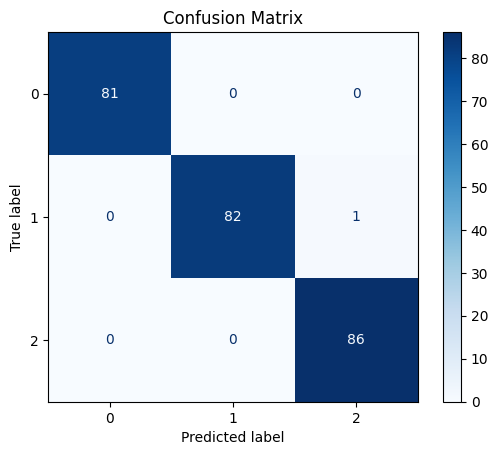

In [108]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and predict are already defined in your notebook
conf_matrix = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


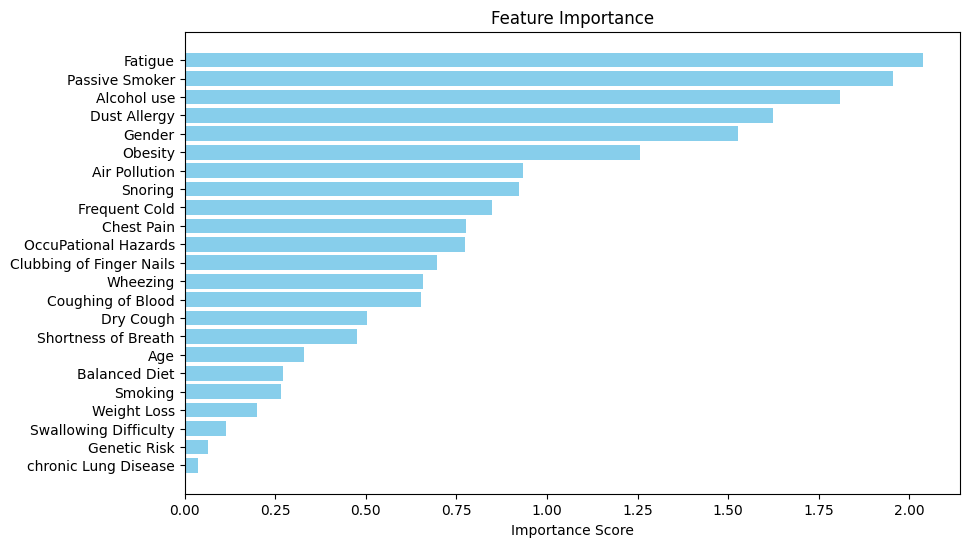

In [109]:
feature_importance = np.abs(model.coef_[0])  # Coefficients represent importance

# Create a dataframe for visualization
features = x.columns
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort values for better visualization
importances = importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert axis to have the highest importance at the top
plt.show()
